<h1>Depression and Sleep Worldwide<h1>

<img src="https://www.bulletproof.com/wp-content/uploads/2018/10/3-Reasons-to-Get-a-Good-Nights-Sleep_header.jpg" width=800 align= center>

<h2>“That we are not much sicker and much madder than we are is due exclusively to that most blessed and blessing of all natural graces, sleep.” - Aldous Huxley<h2>

This quote by the author and philosopher Aldous Huxley (1951) from the middle of the previous century represents an intuitive comorbidity which has come to be evidence-based, between mental illness and sleep disorders. The neurobiology of sleep in people who have a mental disorder often differs from that of healthy individuals. In this project, I will explore the connection between worldwide depression prevalence, and average sleep time.

In [457]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
sns.set()

<h2> Data Preparation <h2>

In [458]:
depression = pd.read_csv("share-with-depression.csv")
time_use = pd.read_csv("TimeUse.csv")

In [459]:
depression.head()

,Entity,Code,Year,Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)
0,Afghanistan,AFG,1990,4.071831
1,Afghanistan,AFG,1991,4.079531
2,Afghanistan,AFG,1992,4.088358
3,Afghanistan,AFG,1993,4.096190
4,Afghanistan,AFG,1994,4.099582


In [460]:
time_use.head()

,SEX,GEO/ACL00,Total,Personal care,Sleep,Eating,Other and/or unspecified personal care,"Employment, related activities and travel as part of/during main and second job",Main and second job and related travel,Activities related to employment and unspecified employment,...,Unspecified leisure,Travel except travel related to jobs,Travel to/from work,Travel related to study,Travel related to shopping and services,Transporting a child,Travel related to other household purposes,"Travel related to leisure, social and associative life",Unspecified travel,Unspecified time use
0,Males,Belgium,24:00,10:45,8:15,1:49,0:42,3:07,3:05,0:02,...,0:01,1:30,0:25,0:02,0:16,0:03,0:00,0:15,0:30,0:01
1,Males,Bulgaria,24:00,11:54,9:08,2:07,0:39,3:32,3:27,0:04,...,0:01,1:07,0:23,0:00,0:12,0:01,0:06,0:21,0:03,0:02
2,Males,Germany (including former GDR from 1991),24:00,10:40,8:08,1:43,0:49,3:27,3:21,0:06,...,0:00,1:29,0:27,0:02,0:16,0:02,0:05,0:34,0:03,0:05
3,Males,Estonia,24:00,10:35,8:24,1:19,0:52,4:27,4:20,0:07,...,0:00,1:12,0:28,0:01,0:13,0:01,0:07,0:22,0:01,0:04
4,Males,Spain,24:00,11:11,8:36,1:47,0:48,4:21,4:17,0:03,...,0:00,1:16,0:31,0:02,0:07,0:02,0:03,0:28,0:02,0:02


In [461]:
time_use = time_use.rename(columns = {"GEO/ACL00": "Entity"})
time_use.head()

,SEX,Entity,Total,Personal care,Sleep,Eating,Other and/or unspecified personal care,"Employment, related activities and travel as part of/during main and second job",Main and second job and related travel,Activities related to employment and unspecified employment,...,Unspecified leisure,Travel except travel related to jobs,Travel to/from work,Travel related to study,Travel related to shopping and services,Transporting a child,Travel related to other household purposes,"Travel related to leisure, social and associative life",Unspecified travel,Unspecified time use
0,Males,Belgium,24:00,10:45,8:15,1:49,0:42,3:07,3:05,0:02,...,0:01,1:30,0:25,0:02,0:16,0:03,0:00,0:15,0:30,0:01
1,Males,Bulgaria,24:00,11:54,9:08,2:07,0:39,3:32,3:27,0:04,...,0:01,1:07,0:23,0:00,0:12,0:01,0:06,0:21,0:03,0:02
2,Males,Germany (including former GDR from 1991),24:00,10:40,8:08,1:43,0:49,3:27,3:21,0:06,...,0:00,1:29,0:27,0:02,0:16,0:02,0:05,0:34,0:03,0:05
3,Males,Estonia,24:00,10:35,8:24,1:19,0:52,4:27,4:20,0:07,...,0:00,1:12,0:28,0:01,0:13,0:01,0:07,0:22,0:01,0:04
4,Males,Spain,24:00,11:11,8:36,1:47,0:48,4:21,4:17,0:03,...,0:00,1:16,0:31,0:02,0:07,0:02,0:03,0:28,0:02,0:02


In [462]:
time_use['Entity'] = time_use['Entity'].str.replace('(','')
time_use['Entity'] = time_use['Entity'].str.replace(')','')
time_use['Entity'] = time_use['Entity'].str.replace('including','')
time_use['Entity'] = time_use['Entity'].str.replace('former','')
time_use['Entity'] = time_use['Entity'].str.replace('GDR','')
time_use['Entity'] = time_use['Entity'].str.replace('from','')
time_use['Entity'] = time_use['Entity'].str.replace('1991','')
time_use.head()

,SEX,Entity,Total,Personal care,Sleep,Eating,Other and/or unspecified personal care,"Employment, related activities and travel as part of/during main and second job",Main and second job and related travel,Activities related to employment and unspecified employment,...,Unspecified leisure,Travel except travel related to jobs,Travel to/from work,Travel related to study,Travel related to shopping and services,Transporting a child,Travel related to other household purposes,"Travel related to leisure, social and associative life",Unspecified travel,Unspecified time use
0,Males,Belgium,24:00,10:45,8:15,1:49,0:42,3:07,3:05,0:02,...,0:01,1:30,0:25,0:02,0:16,0:03,0:00,0:15,0:30,0:01
1,Males,Bulgaria,24:00,11:54,9:08,2:07,0:39,3:32,3:27,0:04,...,0:01,1:07,0:23,0:00,0:12,0:01,0:06,0:21,0:03,0:02
2,Males,Germany,24:00,10:40,8:08,1:43,0:49,3:27,3:21,0:06,...,0:00,1:29,0:27,0:02,0:16,0:02,0:05,0:34,0:03,0:05
3,Males,Estonia,24:00,10:35,8:24,1:19,0:52,4:27,4:20,0:07,...,0:00,1:12,0:28,0:01,0:13,0:01,0:07,0:22,0:01,0:04
4,Males,Spain,24:00,11:11,8:36,1:47,0:48,4:21,4:17,0:03,...,0:00,1:16,0:31,0:02,0:07,0:02,0:03,0:28,0:02,0:02


In [463]:
df = depression.merge(time_use,left_on=['Entity'], right_on=['Entity'])
df.head()

,Entity,Code,Year,Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),SEX,Total,Personal care,Sleep,Eating,Other and/or unspecified personal care,...,Unspecified leisure,Travel except travel related to jobs,Travel to/from work,Travel related to study,Travel related to shopping and services,Transporting a child,Travel related to other household purposes,"Travel related to leisure, social and associative life",Unspecified travel,Unspecified time use
0,Belgium,BEL,1990,3.631738,Males,24:00,10:45,8:15,1:49,0:42,...,0:01,1:30,0:25,0:02,0:16,0:03,0:00,0:15,0:30,0:01
1,Belgium,BEL,1990,3.631738,Females,24:00,11:11,8:34,1:50,0:47,...,0:01,1:22,0:15,0:02,0:18,0:04,0:00,0:16,0:27,0:02
2,Belgium,BEL,1991,3.627543,Males,24:00,10:45,8:15,1:49,0:42,...,0:01,1:30,0:25,0:02,0:16,0:03,0:00,0:15,0:30,0:01
3,Belgium,BEL,1991,3.627543,Females,24:00,11:11,8:34,1:50,0:47,...,0:01,1:22,0:15,0:02,0:18,0:04,0:00,0:16,0:27,0:02
4,Belgium,BEL,1992,3.628315,Males,24:00,10:45,8:15,1:49,0:42,...,0:01,1:30,0:25,0:02,0:16,0:03,0:00,0:15,0:30,0:01


In [464]:
df = df.rename(columns = {"Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)": "Depression"})
df.head(2)

,Entity,Code,Year,Depression,SEX,Total,Personal care,Sleep,Eating,Other and/or unspecified personal care,...,Unspecified leisure,Travel except travel related to jobs,Travel to/from work,Travel related to study,Travel related to shopping and services,Transporting a child,Travel related to other household purposes,"Travel related to leisure, social and associative life",Unspecified travel,Unspecified time use
0,Belgium,BEL,1990,3.631738,Males,24:00,10:45,8:15,1:49,0:42,...,0:01,1:30,0:25,0:02,0:16,0:03,0:00,0:15,0:30,0:01
1,Belgium,BEL,1990,3.631738,Females,24:00,11:11,8:34,1:50,0:47,...,0:01,1:22,0:15,0:02,0:18,0:04,0:00,0:16,0:27,0:02


In [465]:
df['Sleep'] = df['Sleep'].str.replace(':','.')
df['Sleep'] = df['Sleep'].astype('float64')
df.head()

,Entity,Code,Year,Depression,SEX,Total,Personal care,Sleep,Eating,Other and/or unspecified personal care,...,Unspecified leisure,Travel except travel related to jobs,Travel to/from work,Travel related to study,Travel related to shopping and services,Transporting a child,Travel related to other household purposes,"Travel related to leisure, social and associative life",Unspecified travel,Unspecified time use
0,Belgium,BEL,1990,3.631738,Males,24:00,10:45,8.15,1:49,0:42,...,0:01,1:30,0:25,0:02,0:16,0:03,0:00,0:15,0:30,0:01
1,Belgium,BEL,1990,3.631738,Females,24:00,11:11,8.34,1:50,0:47,...,0:01,1:22,0:15,0:02,0:18,0:04,0:00,0:16,0:27,0:02
2,Belgium,BEL,1991,3.627543,Males,24:00,10:45,8.15,1:49,0:42,...,0:01,1:30,0:25,0:02,0:16,0:03,0:00,0:15,0:30,0:01
3,Belgium,BEL,1991,3.627543,Females,24:00,11:11,8.34,1:50,0:47,...,0:01,1:22,0:15,0:02,0:18,0:04,0:00,0:16,0:27,0:02
4,Belgium,BEL,1992,3.628315,Males,24:00,10:45,8.15,1:49,0:42,...,0:01,1:30,0:25,0:02,0:16,0:03,0:00,0:15,0:30,0:01


In [466]:
df.Sleep.dtypes

dtype('float64')

<h2> Modeling <h2>

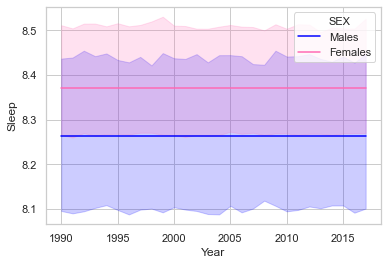

In [475]:
sns.set_style("whitegrid")
sns.lineplot(x='Year', y='Sleep', hue='SEX', data = df, palette=["blue", "hotpink"])

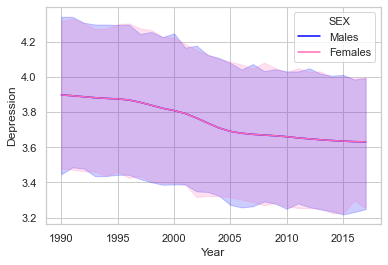

In [476]:
sns.set_style("whitegrid")
sns.lineplot(x='Year', y='Depression', hue='SEX', data = df, palette=["blue", "hotpink"])

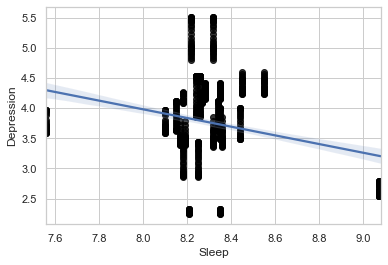

In [477]:
sns.set_style("whitegrid")
sns.regplot(df['Sleep'], df['Depression'], scatter_kws={"color": "black"})

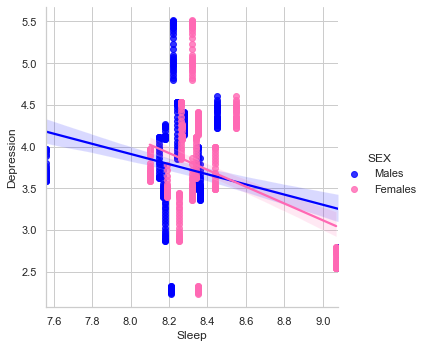

In [478]:
sns.set_style("whitegrid")
sns.lmplot(x = 'Sleep', y = 'Depression', hue = 'SEX', data = df, palette=["blue", "hotpink"])

In [482]:
X = np.array(df['Sleep']).reshape(-1, 1)
y = df['Depression']
rf = LinearRegression()
rf.fit(X, y)
y_pred = rf.predict(X)

<h2> Evaluation <h2>

In [483]:
r2_score(y, y_pred)

0.07112379614526887

In [484]:
df['Sleep'].corr(df['Depression'])

-0.26669045004512015

In conclusion, the r2 score indicates nearly no linear relationship between depression and sleep, while the correlation coefficient indicates a weak negative correlation between depression and sleep. 
Overall I would interpret this as indicating that if you sleep more, you'll be very slightly less depressed :)